# Accident Analysis

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
vehicles=pd.read_csv("drive/My Drive/Fall2022/CS620/Data Science Project/Vehicles.csv")

In [4]:
vehicles.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,VEHICLE_TYPE,VEHICLE_YEAR,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,VEHICLE_DAMAGE,MAJOR_CONTRIBUTING_FACTOR
0,10385780,100201,09-07-2012,09:03,1,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,Unspecified
1,19140702,4213082,09/23/2019,08:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,Station Wagon/Sport Utility Vehicle,2002.0,M,Licensed,Going Straight Ahead,Left Front Quarter Panel,Driver Inattention/Distraction
2,14887647,3307608,10-02-2015,17:18,2,TAXI,NaN,NaN,NaN,Going Straight Ahead,NaN,Driver Inattention/Distraction
3,14889754,3308693,10-04-2015,20:34,1,PASSENGER VEHICLE,NaN,NaN,NaN,Parked,NaN,Unspecified
4,14400270,297666,04/25/2013,21:15,1,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,NaN,Other Vehicular


In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048493 entries, 0 to 1048492
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   UNIQUE_ID                  1048493 non-null  int64  
 1   COLLISION_ID               1048493 non-null  int64  
 2   CRASH_DATE                 1048493 non-null  object 
 3   CRASH_TIME                 1048493 non-null  object 
 4   VEHICLE_ID                 1048493 non-null  object 
 5   VEHICLE_TYPE               1033152 non-null  object 
 6   VEHICLE_YEAR               187648 non-null   float64
 7   DRIVER_SEX                 165925 non-null   object 
 8   DRIVER_LICENSE_STATUS      154807 non-null   object 
 9   PRE_CRASH                  624714 non-null   object 
 10  VEHICLE_DAMAGE             196444 non-null   object 
 11  MAJOR_CONTRIBUTING_FACTOR  1030613 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 96.0+ MB


In [6]:
persons=pd.read_csv("drive/My Drive/Fall2022/CS620/Data Science Project/Persons.csv")

In [7]:
persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,VEHICLE_ID,PERSON_AGE,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PERSON_SEX
0,10249006,4229554,10/26/2019,09:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,19141108.0,NaN,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,19144075.0,33.0,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,19143133.0,55.0,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,NaN,NaN,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,19144329.0,7.0,Right rear passenger or motorcycle sidecar pas...,Lap Belt,F


In [8]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   UNIQUE_ID            1048575 non-null  int64  
 1   COLLISION_ID         1048575 non-null  int64  
 2   CRASH_DATE           1048575 non-null  object 
 3   CRASH_TIME           1048575 non-null  object 
 4   PERSON_ID            1048572 non-null  object 
 5   PERSON_TYPE          1048575 non-null  object 
 6   VEHICLE_ID           986929 non-null   float64
 7   PERSON_AGE           964117 non-null   float64
 8   POSITION_IN_VEHICLE  525172 non-null   object 
 9   SAFETY_EQUIPMENT     525133 non-null   object 
 10  PERSON_SEX           910026 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 88.0+ MB


In [9]:
vehicles=vehicles.dropna()
persons=persons.dropna()
vehicles=vehicles[vehicles["VEHICLE_YEAR"]<2021]
persons=persons[(persons["PERSON_AGE"]>0) & (persons["PERSON_AGE"]<100)]
vehicles = vehicles[vehicles["MAJOR_CONTRIBUTING_FACTOR"] != "Unspecified"]
persons.dropna(subset=['VEHICLE_ID','PERSON_AGE'],inplace=True)

In [10]:
vehicles["VEHICLE_YEAR"]=vehicles["VEHICLE_YEAR"].astype(int)
persons["PERSON_AGE"]=persons["PERSON_AGE"].astype(int)
persons["VEHICLE_ID"]=persons["VEHICLE_ID"].astype(int)

In [11]:
vehicles.groupby("VEHICLE_YEAR")["VEHICLE_YEAR"].count().sort_values(ascending=False).head(5)

VEHICLE_YEAR
2015    9763
2014    7536
2016    7438
2013    5851
2012    4712
Name: VEHICLE_YEAR, dtype: int64

Text(0, 0.5, 'Number Of Accidents')

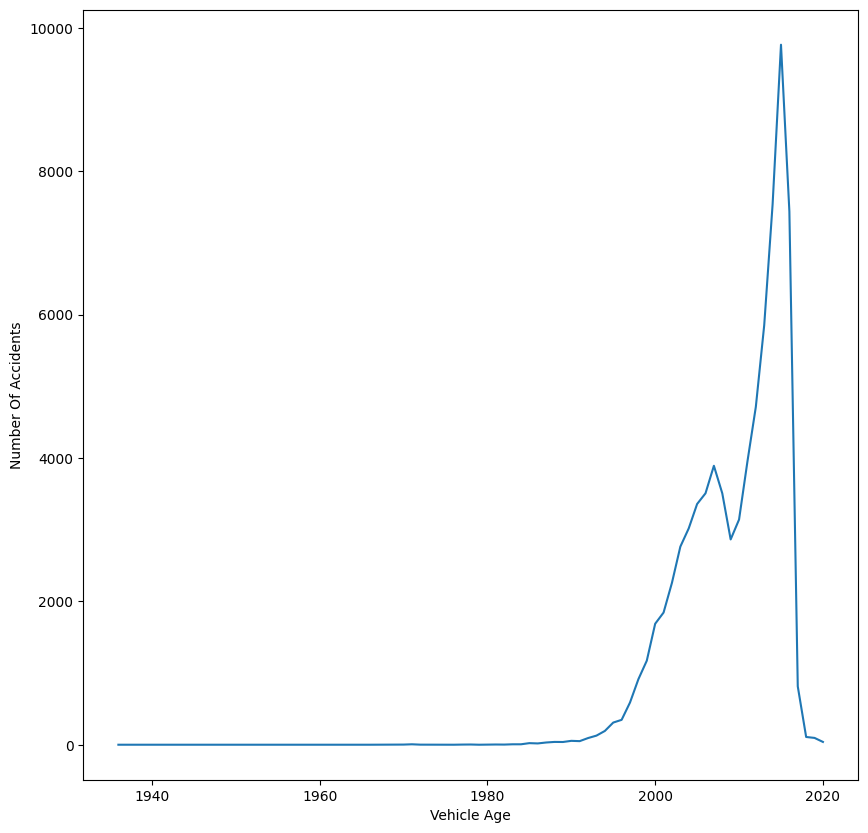

In [12]:
#The graph shows how the number of accidents varies with vehicle manufacturing year
vehicles.groupby("VEHICLE_YEAR")["VEHICLE_YEAR"].count().plot(kind="line",figsize=(10,10))
plt.xlabel("Vehicle Age")
plt.ylabel("Number Of Accidents")

In [13]:
vehicles.groupby("DRIVER_SEX")["DRIVER_SEX"].count()

DRIVER_SEX
F    18795
M    57204
U      214
Name: DRIVER_SEX, dtype: int64

<Axes: ylabel='DRIVER_SEX'>

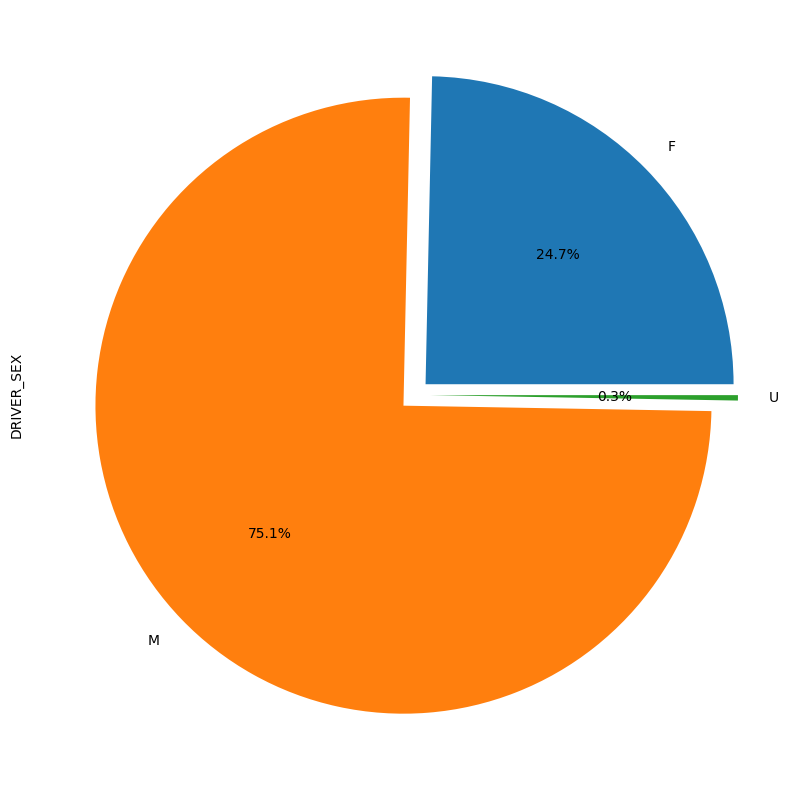

In [14]:
#The graph shows how sex of the person driving the vehicle effects the number of accidents
vehicles.groupby("DRIVER_SEX")["DRIVER_SEX"].count().plot.pie(y=vehicles.groupby("DRIVER_SEX")["DRIVER_SEX"].count(),legend=False,autopct="%1.1f%%",figsize=(10,10),explode=(0.05,0.05,0.05),shadow=False,startangle=0)


In [15]:
vehicles.groupby("DRIVER_LICENSE_STATUS")["DRIVER_LICENSE_STATUS"].count()

DRIVER_LICENSE_STATUS
Licensed      73920
Permit          617
Unlicensed     1676
Name: DRIVER_LICENSE_STATUS, dtype: int64

Text(0, 0.5, 'Number Of Accidents')

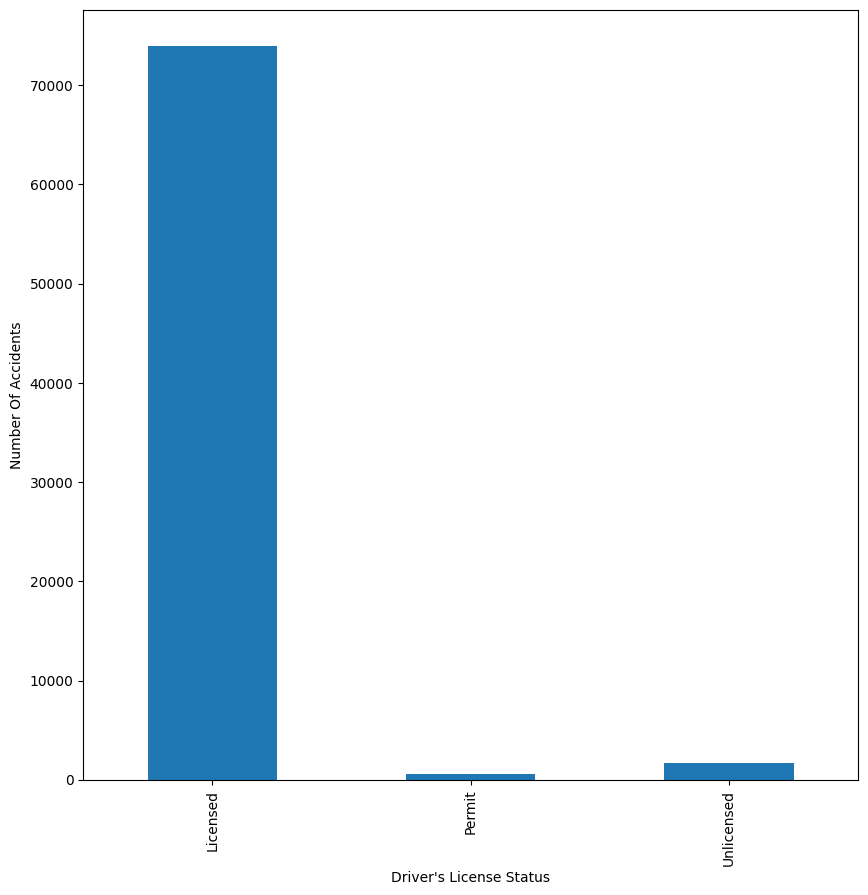

In [16]:
#Barchart showing driver's license status during accident time
vehicles.groupby("DRIVER_LICENSE_STATUS")["DRIVER_LICENSE_STATUS"].count().plot(kind="bar",figsize=(10,10))
plt.xlabel("Driver's License Status")
plt.ylabel("Number Of Accidents")

In [17]:
persons.groupby("PERSON_AGE")["PERSON_AGE"].count().sort_values(ascending=False).head(5)

PERSON_AGE
27    13320
28    13216
26    13098
29    12971
30    12829
Name: PERSON_AGE, dtype: int64

Text(0, 0.5, 'Number Of Accidents')

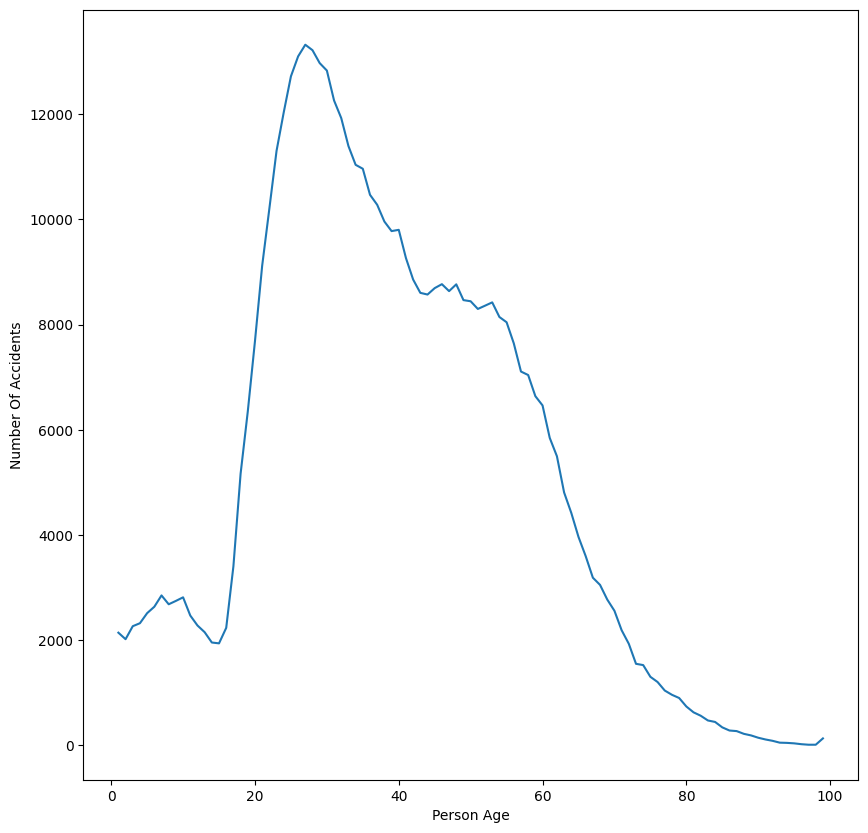

In [18]:
#The line chart shows number of people of different age groups involved accidents
persons.groupby("PERSON_AGE")["PERSON_AGE"].count().plot(kind="line",figsize=(10,10))
plt.xlabel("Person Age")
plt.ylabel("Number Of Accidents")

In [19]:
vehicles.groupby("MAJOR_CONTRIBUTING_FACTOR")["MAJOR_CONTRIBUTING_FACTOR"].count().sort_values(ascending=False).head(5)

MAJOR_CONTRIBUTING_FACTOR
Driver Inattention/Distraction    23944
Following Too Closely              9941
Failure to Yield Right-of-Way      6550
Passing or Lane Usage Improper     4198
Backing Unsafely                   4030
Name: MAJOR_CONTRIBUTING_FACTOR, dtype: int64

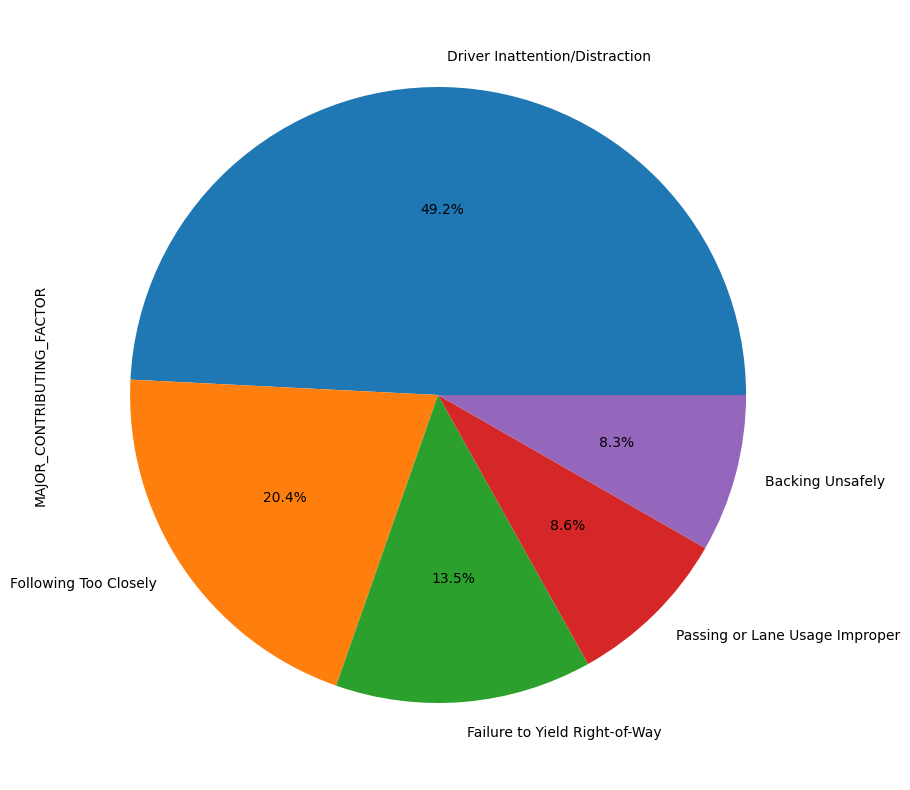

In [20]:
vehicles.groupby("MAJOR_CONTRIBUTING_FACTOR")["MAJOR_CONTRIBUTING_FACTOR"].count().sort_values(ascending=False).head(5).plot(kind="pie",figsize=(10,10),autopct="%.1f%%")
plt.show()

In [32]:
merged_df = pd.merge(vehicles, persons, on='COLLISION_ID', how='inner')
merged_df.head()

,UNIQUE_ID_x,COLLISION_ID,CRASH_DATE_x,CRASH_TIME_x,VEHICLE_ID_x,VEHICLE_TYPE,VEHICLE_YEAR,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,...,UNIQUE_ID_y,CRASH_DATE_y,CRASH_TIME_y,PERSON_ID,PERSON_TYPE,VEHICLE_ID_y,PERSON_AGE,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PERSON_SEX
0,17303317,3503027,08/18/2016,12:39,672828,Station Wagon/Sport Utility Vehicle,2005,F,Licensed,Going Straight Ahead,...,6503635,08/18/2016,12:39,1632408,Occupant,17303317,22,Driver,Lap Belt,F
1,17303316,3503027,08/18/2016,12:39,672827,Box Truck,2016,M,Licensed,Starting in Traffic,...,6503635,08/18/2016,12:39,1632408,Occupant,17303317,22,Driver,Lap Belt,F
2,19138486,4228644,10/24/2019,10:25,8ada1656-bb64-4bba-91b5-f8872d9de368,Sedan,2008,M,Licensed,Going Straight Ahead,...,10243608,10/24/2019,10:25,89b2be9c-13f3-45bd-adbb-30b57277341d,Occupant,19138486,39,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,F
3,19139804,4229205,10/24/2019,12:10,009f5608-f1c8-4747-91be-6b707a1fda3d,Station Wagon/Sport Utility Vehicle,2019,M,Licensed,Entering Parked Position,...,10246353,10/24/2019,12:10,bde47e4d-a583-4f2a-9477-6ddc45a8f6e2,Occupant,19139803,36,Driver,Lap Belt & Harness,M
4,19139096,4229018,10/24/2019,21:55,6ce523e1-6a14-4bcb-8e98-b2bdc5a74542,Sedan,2018,M,Licensed,Going Straight Ahead,...,10244938,10/24/2019,21:55,c259c90e-18ac-447a-8dd7-d38383a027be,Occupant,19139096,57,Right rear passenger or motorcycle sidecar pas...,None,M


In [33]:
merged_df=merged_df.dropna()
merged_df=merged_df.drop(["UNIQUE_ID_x","VEHICLE_ID_x","CRASH_TIME_x","UNIQUE_ID_y","CRASH_DATE_y","CRASH_TIME_y","PERSON_ID","PERSON_TYPE","VEHICLE_ID_y","PERSON_AGE","POSITION_IN_VEHICLE","PERSON_SEX"],axis=1)

In [34]:
merged_df.rename(columns={'CRASH_DATE_x': 'CRASH_DATE'}, inplace=True)

In [35]:
merged_df.to_csv('final_data.csv',index=False)

In [38]:


# The data in the dataset contains multiple formats for date column. Changing all of them to %m%d%Y
date_formats = ['%m/%d/%Y', '%m-%d-%Y']

def try_parsing_date(date):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    return pd.NaT

merged_df['CRASH_DATE'] = merged_df['CRASH_DATE'].apply(try_parsing_date).dt.strftime('%m%d%Y')


In [39]:
print(merged_df.dtypes)

COLLISION_ID                  int64
CRASH_DATE                   object
VEHICLE_TYPE                 object
VEHICLE_YEAR                  int64
DRIVER_SEX                   object
DRIVER_LICENSE_STATUS        object
PRE_CRASH                    object
VEHICLE_DAMAGE               object
MAJOR_CONTRIBUTING_FACTOR    object
SAFETY_EQUIPMENT             object
dtype: object


In [47]:
merged_df.head()

,COLLISION_ID,CRASH_DATE,VEHICLE_TYPE,VEHICLE_YEAR,DRIVER_SEX,DRIVER_LICENSE_STATUS,PRE_CRASH,VEHICLE_DAMAGE,MAJOR_CONTRIBUTING_FACTOR,SAFETY_EQUIPMENT
0,3503027,8182016,Station Wagon/Sport Utility Vehicle,2005,F,Licensed,Going Straight Ahead,Center Front End,Driver Inattention/Distraction,Lap Belt
1,3503027,8182016,Box Truck,2016,M,Licensed,Starting in Traffic,No Damage,Driver Inattention/Distraction,Lap Belt
2,4228644,10242019,Sedan,2008,M,Licensed,Going Straight Ahead,No Damage,Driver Inattention/Distraction,Lap Belt & Harness
3,4229205,10242019,Station Wagon/Sport Utility Vehicle,2019,M,Licensed,Entering Parked Position,Right Front Bumper,Backing Unsafely,Lap Belt & Harness
4,4229018,10242019,Sedan,2018,M,Licensed,Going Straight Ahead,Left Front Bumper,Failure to Yield Right-of-Way,None


In [41]:
merged_df["CRASH_DATE"]=merged_df["CRASH_DATE"].astype(int)

categorical_columns = ['DRIVER_SEX', 'DRIVER_LICENSE_STATUS', 'PRE_CRASH','VEHICLE_DAMAGE','SAFETY_EQUIPMENT']
merged_df[categorical_columns]=merged_df[categorical_columns].astype('category')

df_encoded = pd.get_dummies(merged_df, columns=categorical_columns,drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56375 entries, 0 to 56374
Data columns (total 61 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   COLLISION_ID                                               56375 non-null  int64 
 1   CRASH_DATE                                                 56375 non-null  int64 
 2   VEHICLE_TYPE                                               56375 non-null  object
 3   VEHICLE_YEAR                                               56375 non-null  int64 
 4   MAJOR_CONTRIBUTING_FACTOR                                  56375 non-null  object
 5   DRIVER_SEX_M                                               56375 non-null  uint8 
 6   DRIVER_SEX_U                                               56375 non-null  uint8 
 7   DRIVER_LICENSE_STATUS_Permit                               56375 non-null  uint8 
 8   DRIVER_LICENSE_S

In [42]:
print(merged_df.dtypes)

COLLISION_ID                    int64
CRASH_DATE                      int64
VEHICLE_TYPE                   object
VEHICLE_YEAR                    int64
DRIVER_SEX                   category
DRIVER_LICENSE_STATUS        category
PRE_CRASH                    category
VEHICLE_DAMAGE               category
MAJOR_CONTRIBUTING_FACTOR      object
SAFETY_EQUIPMENT             category
dtype: object


In [43]:
print(df_encoded.dtypes)

COLLISION_ID                                                  int64
CRASH_DATE                                                    int64
VEHICLE_TYPE                                                 object
VEHICLE_YEAR                                                  int64
MAJOR_CONTRIBUTING_FACTOR                                    object
                                                              ...  
SAFETY_EQUIPMENT_None                                         uint8
SAFETY_EQUIPMENT_Other                                        uint8
SAFETY_EQUIPMENT_Pads Only (In-Line Skater/Bicyclist)         uint8
SAFETY_EQUIPMENT_Stoppers Only (In-Line Skater/Bicyclist)     uint8
SAFETY_EQUIPMENT_Unknown                                      uint8
Length: 61, dtype: object


In [44]:
categorical_columns = ['VEHICLE_TYPE']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)



In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56375 entries, 0 to 56374
Columns: 229 entries, COLLISION_ID to VEHICLE_TYPE_vn
dtypes: int64(3), object(1), uint8(225)
memory usage: 14.2+ MB


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['MAJOR_CONTRIBUTING_FACTOR'] = label_encoder.fit_transform(df_encoded['MAJOR_CONTRIBUTING_FACTOR'])

# Extracting features (X) and target variable (y)
X = df_encoded.drop('MAJOR_CONTRIBUTING_FACTOR', axis=1)
y = df_encoded['MAJOR_CONTRIBUTING_FACTOR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing Random Forest model as the Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.5539689578713969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.63      0.40      0.49        47
           2       0.64      0.35      0.45       139
           3       0.33      0.40      0.36         5
           4       0.74      0.85      0.79       477
           5       0.69      0.37      0.48        54
           6       0.33      0.20      0.25         5
           7       0.00      0.00      0.00         1
           8       0.53      0.66      0.59      3502
           9       0.61      0.38      0.47       271
          10       0.00      0.00      0.00         2
          11       0.67      0.22      0.33         9
          12       0.00      0.00      0.00         2
          13       0.47      0.36      0.41        22
          14       0.52      0.45      0.48       969
          15       0.75      0.16      0.26        19
          16       0.54    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
